# Introduction

## Setup

First, check if you are at the correct project environment. The project file loaded should be `ExperimentalDesign/examples/Project.toml`:

In [ ]:
using Pkg
Pkg.status()

Then check if all packages are installed and up to date:

In [ ]:
Pkg.update()

In [ ]:
using ExperimentalDesign, StatsModels, GLM, DataFrames, Distributions, Random, StatsPlots

# Generating Random Designs



In [4]:
design_distribution = DesignDistribution((size = Uniform(23, 32), weight = Uniform(0, 100)))

DesignDistribution
Formula: 0 ~ size + weight
Factor Distributions:
size: Uniform{Float64}(a=23.0, b=32.0)
weight: Uniform{Float64}(a=0.0, b=100.0)

In [10]:
rand(design_distribution, 3)

ExperimentalDesign.RandomDesign
Dimension: (3, 2)
Factors: (size = Uniform{Float64}(a=23.0, b=32.0), weight = Uniform{Float64}(a=0.0, b=100.0))
Formula: 0 ~ size + weight
Design Matrix:
3×2 DataFrame
│ Row │ size    │ weight  │
│     │ Float64 │ Float64 │
├─────┼─────────┼─────────┤
│ 1   │ 26.6751 │ 74.2264 │
│ 2   │ 30.6457 │ 11.1697 │
│ 3   │ 26.1334 │ 56.7691 │

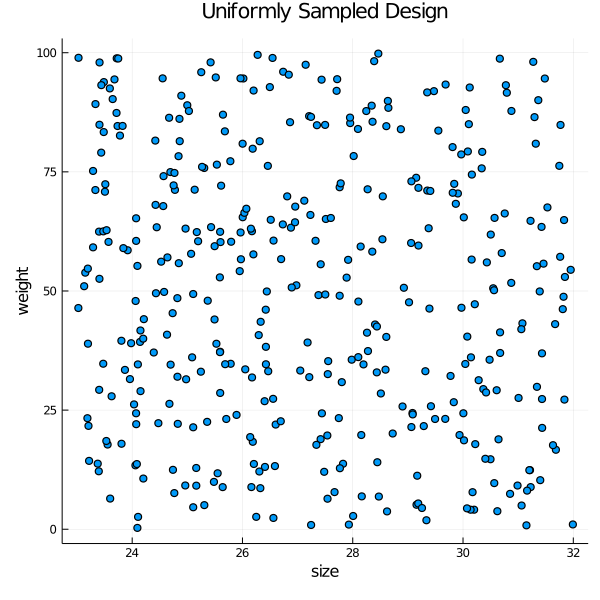

In [11]:
design = rand(design_distribution, 400)

@df design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    xlim = [23.0, 32.0],
    ylim = [0.0, 100.0],
    legend = false,
    title = "Uniformly Sampled Design")

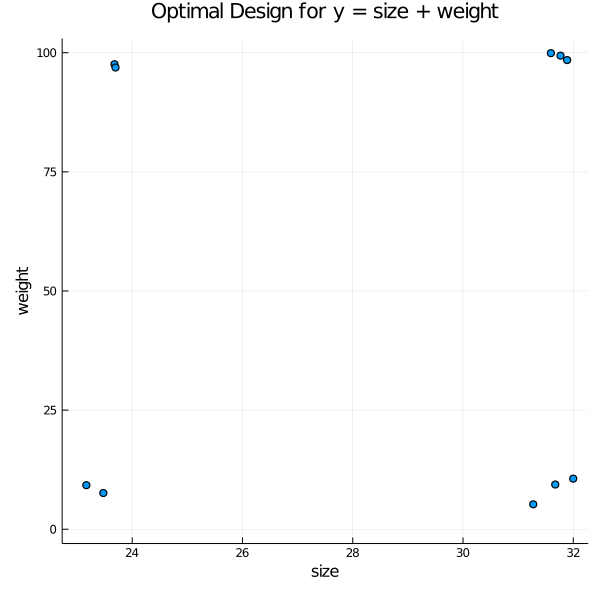

In [12]:
design = rand(design_distribution, 400);

f = @formula 0 ~ size + weight

optimal_design = OptimalDesign(design, f, 10)


@df optimal_design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    xlim = [23.0, 32.0],
    ylim = [0.0, 100.0],
    legend = false,
    title = "Optimal Design for y = size + weight")

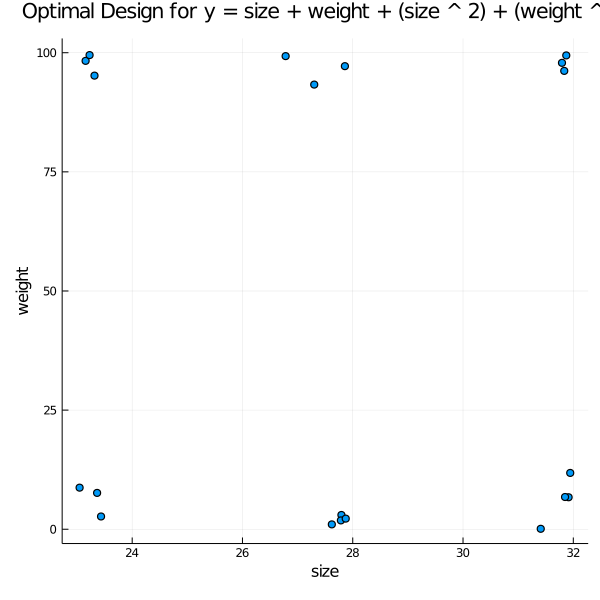

In [13]:
design = rand(design_distribution, 400);
f = @formula 0 ~ size + weight + size ^ 2 + (1 / weight)

optimal_design = OptimalDesign(design, f, 20)

@df optimal_design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    xlim = [23.0, 32.0],
    ylim = [0.0, 100.0],
    legend = false,
    title = "Optimal Design for y = size + weight + (size ^ 2) + (weight ^ 2)")

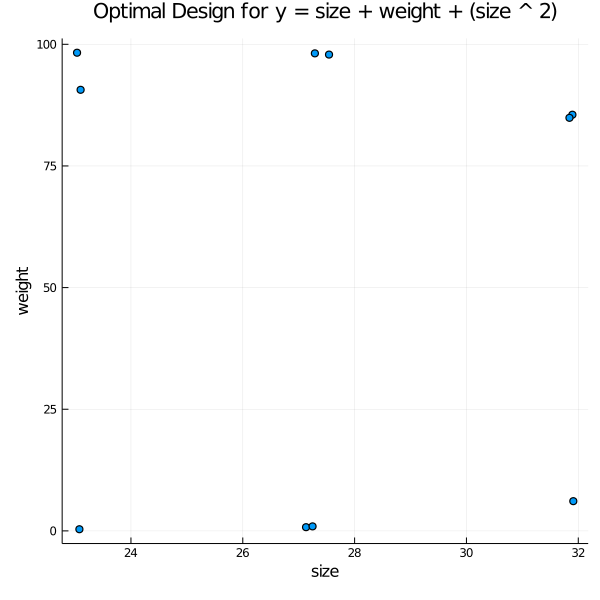

In [18]:
design = rand(design_distribution, 800);
f = @formula 0 ~ size + weight + size ^ 2
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:size,
    :weight,
    size = (600, 600),
    xlabel = "size",
    ylabel = "weight",
    legend = false,
    title = "Optimal Design for y = size + weight + (size ^ 2)")

In [19]:
design_distribution = DesignDistribution((f1 = DiscreteUniform(0, 5),
        f2 = Uniform(0, 1)))

DesignDistribution
Formula: 0 ~ f1 + f2
Factor Distributions:
f1: DiscreteUniform(a=0, b=5)
f2: Uniform{Float64}(a=0.0, b=1.0)

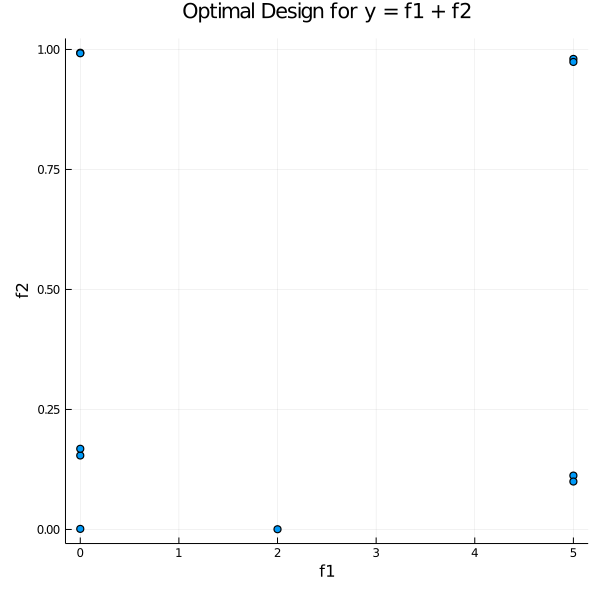

In [20]:
design = rand(design_distribution, 400);
f = @formula 0 ~ f1 + f2 + log(f2)
optimal_design = OptimalDesign(design, f, 10)
@df optimal_design.matrix scatter(:f1,
    :f2,
    size = (600, 600),
    xlabel = "f1",
    ylabel = "f2",
    legend = false,
    title = "Optimal Design for y = f1 + f2")